In [192]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import visuals as vs


%matplotlib inline


data = pd.read_csv("census.csv")


display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [193]:
from __future__ import division
income = data['income']

n_records = np.size(income.values)

n_greater_50k = np.sum('>50K' == income.values)

n_at_most_50k = np.sum('<=50K' == income.values)

greater_percent = n_greater_50k/(n_records)

print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.1f}%".format(100*greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%


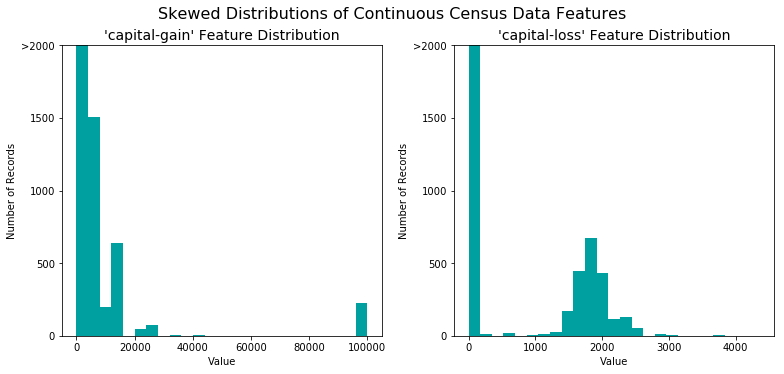

In [194]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

vs.distribution(data)



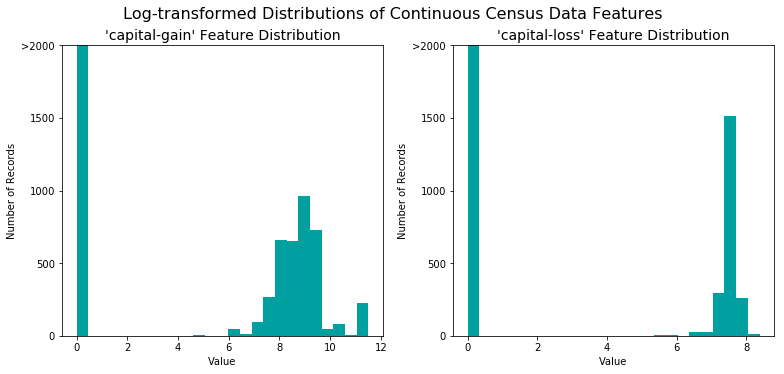

In [195]:
skewed = ['capital-gain','capital-loss']

features_log_transformed = pd.DataFrame(data = features_raw)



features_log_transformed[skewed] = features_raw[skewed].apply(lambda x : np.log(x+1))


vs.distribution(features_log_transformed, transformed = True)


In [196]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)

features_log_minmax_transform[numerical] = scalar.fit_transform(features_log_transformed[numerical])
    
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [197]:

features_final = pd.get_dummies(features_log_minmax_transform)

income = [int(elem == "<=50K") for elem in income_raw]

encoded = list(features_final.columns)

print '{} tota featurs after one-hot encoding.'.format(len(encoded))


103 tota featurs after one-hot encoding.


In [198]:
#income  = income_raw == "<=50K"

#income = map(lambda x: 1 if x else 0, income)

#[int(elem=="<=50K") for elem in income_raw]

In [199]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                  income,
                                                  test_size = 0.2,
                                                  random_state = 0)

print 'Training set has {} samples.'.format(X_train.shape[0])
print 'Testing set has {} samples.'.format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


### Supervised Learning models to be tested
Gaussian Naive Bayes (GaussianNB)

Decision Trees

Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)

K-Nearest Neighbors (KNeighbors)

Stochastic Gradient Descent Classifier (SGDC)

Support Vector Machines (SVM)

Logistic Regression

In [200]:
from sklearn.metrics import accuracy_score, fbeta_score 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    
    results['train_time'] = end-start
        
   
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
  
    results['pred_time'] = end-start
            

    
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])

    results['acc_test'] = accuracy_score(predictions_test, y_test)

    
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='micro', beta=0.5)

        
    
    results['f_test'] = fbeta_score(y_test, predictions_test, average='micro', beta=0.5)

       
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

In [201]:

accuracy = np.sum(income)/len(income)
recall = np.sum(income)/(len(income))
precision = np.sum(income)/(len(income)+np.sum(income))

beta = 0.5


fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision))


print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.7522, F-score: 3.7608]


GaussianNB trained on 361.77 samples.
GaussianNB trained on 3617.7 samples.
GaussianNB trained on 36177 samples.
AdaBoostClassifier trained on 361.77 samples.
AdaBoostClassifier trained on 3617.7 samples.
AdaBoostClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361.77 samples.
KNeighborsClassifier trained on 3617.7 samples.
KNeighborsClassifier trained on 36177 samples.


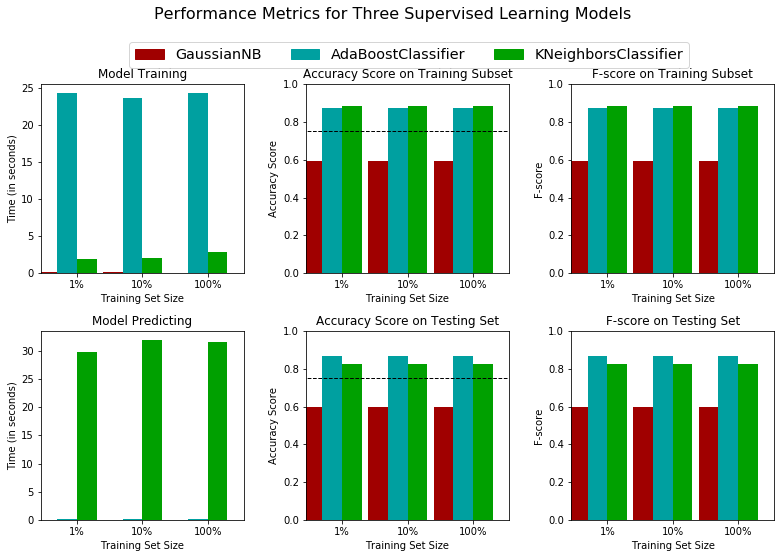

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

clf_A = GaussianNB()
clf_B = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         algorithm="SAMME",
                        n_estimators=200)

clf_C = KNeighborsClassifier()


samples_100 = len(y_train)
samples_10 = 0.1*len(y_train)
samples_1 = 0.01*len(y_train)


results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)



In [203]:
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import fbeta_score, make_scorer

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

parameters = {'max_depth': [1,2,3,4,5,6], 'learning_rate': [0.05, 0.1, 0.15]}



scorer = make_scorer(fbeta_score, beta=2)


grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,scoring=scorer)


grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.8939

Optimized Model
------
Final accuracy score on the testing data: 0.8444
Final F-score on the testing data: 0.8722


The optimized model is overfitting ther

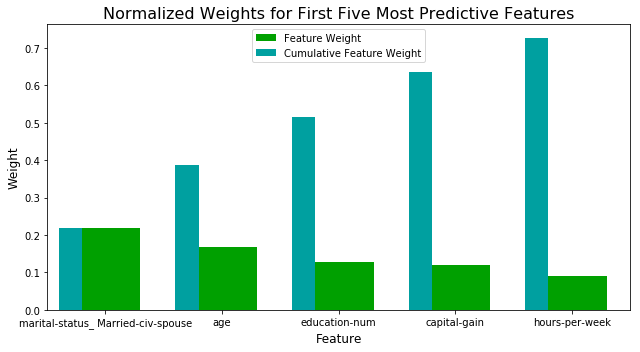

In [204]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier().fit(X_train, y_train)

 
importances = model.feature_importances_


vs.feature_plot(importances, X_train, y_train)